In [7]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import pandas as pd

In [15]:
data = pd.read_csv('TMNIST_Data.csv')
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data['labels'].value_counts()

0    2990
1    2990
2    2990
3    2990
4    2990
5    2990
6    2990
7    2990
8    2990
9    2990
Name: labels, dtype: int64

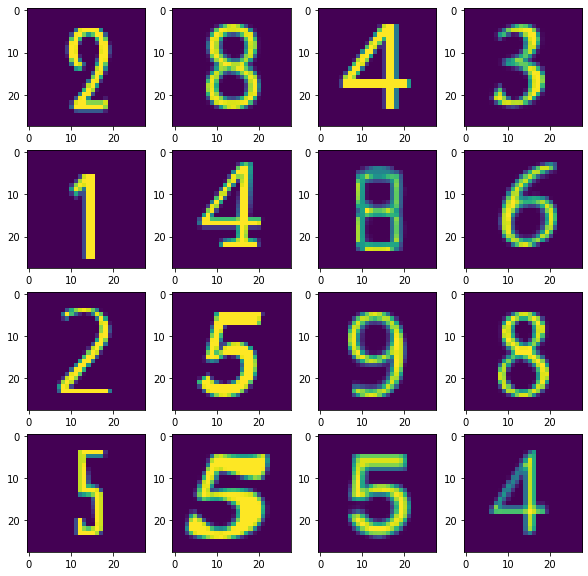

In [14]:
images = data.iloc[:16, 2:].to_numpy()
images = [img.reshape(28, 28).astype('float') for img in images]

fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(16):
    axs[i//4][i % 4].imshow(images[i])
plt.show()


In [4]:
X = data.iloc[:, 2:]
y = data.iloc[:, 1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((20033, 784), (20033,), (9867, 784), (9867,))

In [5]:
svm = SVC()
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [6]:
parameters = {
    'C': [1.0, 3.0, 4.0],
    'kernel': ['rbf', 'linear'],
    'random_state': [0]
}

clf = GridSearchCV(svm, parameters)
clf.fit(x_train, y_train)
print(classification_report(y_test, clf.predict(x_test)))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1011
           1       0.96      0.98      0.97       992
           2       0.99      0.99      0.99      1000
           3       0.99      0.98      0.98       965
           4       0.98      0.99      0.99       986
           5       0.99      0.98      0.98       991
           6       0.99      0.98      0.99       969
           7       0.98      0.98      0.98       946
           8       0.98      0.98      0.98      1002
           9       0.99      0.97      0.98      1005

    accuracy                           0.98      9867
   macro avg       0.98      0.98      0.98      9867
weighted avg       0.98      0.98      0.98      9867

